# To visualize the activation map
1. the activation map before GAP with method of summing up the activation map along channel then followed a spatial L2 normalization 
2. the activation map before GAP with method of averaging the activation map along channel when the attention convolution is added

In [1]:
import numpy as np
from tqdm import tqdm
distmat = np.load("../dismat.npy")
q_pids = np.load("../q_pids.npy")
g_pids = np.load("../g_pids.npy")
q_camids = np.load("../q_camids.npy")
g_camids = np.load("../g_camids.npy")

# Rank1 Debug

In [7]:
num_q, num_g = distmat.shape
indices = np.argsort(distmat, axis=1)
matches = (g_pids[indices] == q_pids[:, np.newaxis]).astype(np.int32)

In [44]:
sum(matches[q_idx][keep])

17

In [42]:
q_idx = 0
    # get query pid and camid
q_pid = q_pids[q_idx]
q_camid = q_camids[q_idx]

# remove gallery samples that have the same pid and camid with query
order = indices[q_idx]
remove = (g_pids[order] == q_pid) & (g_camids[order] == q_camid)
keep = np.invert(remove)

# compute cmc curve
orig_cmc = matches[q_idx][keep]

In [36]:
matches[q_idx][keep][:20]

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
      dtype=int32)

In [37]:
matches[q_idx][keep][17]

1

In [43]:
num_match = 0
for idx, match in enumerate(matches[q_idx][keep]):
    if match == 0:
        num_match += 1
    if num_match == 1:
        num_success_q = sum(matches[q_idx][keep][:idx])
        break
num_success_q

17

In [39]:
matches[q_idx][keep][:i]

array([0, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int32)

In [79]:
num_valid_q = 0. # number of valid query
num_success_q = np.zeros(50)
for q_idx in tqdm(range(num_q), desc="CMC"):
    # get query pid and camid
    q_pid = q_pids[q_idx]
    q_camid = q_camids[q_idx]

    # remove gallery samples that have the same pid and camid with query
    order = indices[q_idx]
    remove = (g_pids[order] == q_pid) & (g_camids[order] == q_camid)
    keep = np.invert(remove)

    num_valid_q += sum(matches[q_idx][keep])

    num_match = 0
    for idx, match in enumerate(matches[q_idx][keep]):
        if match == 0:
            num_match += 1
            for i in range(50):
                if num_match == i+1:
                    num_success_q[i] += sum(matches[q_idx][keep][:idx])
            if num_match == 50:    
                break

CMC: 100%|██████████| 3368/3368 [00:17<00:00, 191.45it/s]


In [80]:
num_success_q / num_valid_q

array([0.72740639, 0.7786461 , 0.80412496, 0.82154726, 0.83510242,
       0.84581764, 0.85492155, 0.86257528, 0.86968519, 0.8759693 ,
       0.88110536, 0.88595944, 0.8906121 , 0.89500292, 0.89917219,
       0.90358315, 0.90706761, 0.90966585, 0.91264678, 0.91520474,
       0.91738001, 0.9198574 , 0.92237507, 0.92422808, 0.92591996,
       0.92761184, 0.92914258, 0.93053234, 0.93186167, 0.93313058,
       0.93433906, 0.93566839, 0.9366956 , 0.93792423, 0.93883059,
       0.93981752, 0.94064332, 0.94177123, 0.94255675, 0.94320127,
       0.9441882 , 0.94485287, 0.9455981 , 0.94630305, 0.94714899,
       0.94799492, 0.94863945, 0.94938468, 0.94982779, 0.95035147])

In [73]:
num_success_q

[0.0, 5.0, 14.0, 10.0]

#  Recall Debug

In [172]:
num_q, num_g = distmat.shape
indices = np.tile(g_pids, (q_pids.shape[0],1))
matches = (indices == q_pids[:, np.newaxis]).astype(np.int32)
confmat = 1 - distmat

# compute cmc curve for each query

recalls = []
precisions = []
for thresh in range(0,101,10):
    recall = []
    precision = []
    thresh *= 0.01
    for q_idx in range(num_q):
        # get query pid and camid
        q_pid = q_pids[q_idx]
        q_camid = q_camids[q_idx]

        # remove gallery samples that have the same pid and camid with query        
        remove = (g_pids == q_pid) & (g_camids == q_camid)
        keep = np.invert(remove)

        # compute number of true positive and positive given query
        TP = np.sum(confmat[q_idx][keep][matches[q_idx][keep]==1] >= thresh, dtype=np.float32)
        PP = np.sum(confmat[q_idx][keep] >= thresh, dtype=np.float32)
        P = np.sum(matches[q_idx][keep], dtype=np.float32)
        recall.append(TP/P)
        precision.append(TP/PP if PP != 0.0 else 0.0)

    recall = np.array(recall)
    recalls.append(np.mean(recall))
    precision = np.array(precision)
    precisions.append(np.mean(precision))

In [11]:
indices[0,:20]

array([ 7324, 14641,  1030,  9757,  6192, 17113,  4910,  9665, 14006,
        6882, 16619, 14088,  2480,  4585, 15715, 11756,  5073,  7493,
        9930,   774])

In [13]:
distmat.shape

(2228, 17661)

In [15]:
matches[0][:20]
1 - distmat[0][indices[0,:20]]

array([0.5973792 , 0.58003515, 0.56540143, 0.5572921 , 0.53812695,
       0.4776522 , 0.4719708 , 0.45707273, 0.39473063, 0.37657565,
       0.36035746, 0.35868156, 0.3560952 , 0.34742212, 0.34707183,
       0.3452152 , 0.34336805, 0.3374946 , 0.3361132 , 0.33378392],
      dtype=float32)

In [2]:
num_q, num_g = distmat.shape
indices = np.tile(g_pids, (q_pids.shape[0],1))
matches = (indices == q_pids[:, np.newaxis]).astype(np.int32)

In [5]:
confmat = 1 - distmat
q_idx = 0
thresh = 0.5
q_pid = q_pids[q_idx]
q_camid = q_camids[q_idx]

# remove gallery samples that have the same pid and camid with query        
remove = (g_pids == q_pid) & (g_camids == q_camid)
keep = np.invert(remove)

# compute number of true positive and positive given query
TP = np.sum(confmat[q_idx][keep][matches[q_idx][keep]==1] >= thresh, dtype=np.float32)
PP = np.sum(confmat[q_idx][keep] >= thresh, dtype=np.float32)
P = np.sum(matches[q_idx][keep], dtype=np.float32)

In [6]:
TP

0.0

In [174]:
thresh = np.array(list(range(0,101,10)))*0.01
recalls = np.array(recalls)
precisions = np.array(precisions)
df = pd.DataFrame({'thresh': thresh, 'recall': recalls, 'precision': precisions})

In [175]:
df

,thresh,recall,precision
0,0.0,0.997870,0.001682
1,0.1,0.995874,0.006813
2,0.2,0.989064,0.033687
3,0.3,0.970726,0.135597
4,0.4,0.931011,0.406506
5,0.5,0.844062,0.708921
6,0.6,0.679230,0.844853
7,0.7,0.409105,0.774011
8,0.8,0.108481,0.420161
9,0.9,0.002088,0.019002


In [169]:
sum(confmat[0] >= 0.71)

9

In [164]:
df.to_csv("../recall.csv", index=False)

In [141]:
df[df['thresh']==0.1]['recall'].iloc[0]

0.9958744

Populating the interactive namespace from numpy and matplotlib


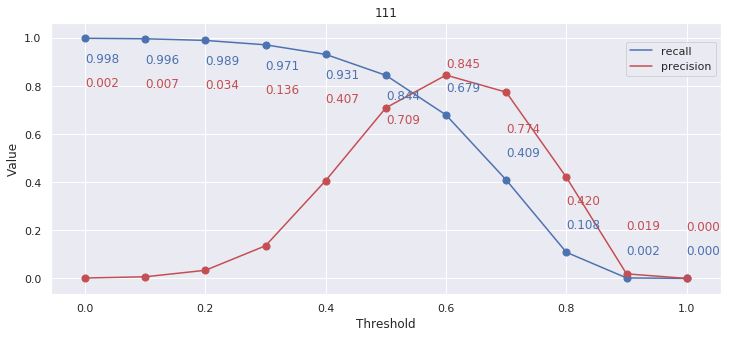

In [290]:
%pylab inline
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.title("{}".format(111))
sns.set()
sns.lineplot(x="thresh", y="recall", data=df, color="b", label="recall")
sns.lineplot(x="thresh", y="precision", data=df, color="r", label="precision")
for i in range(0,101,10):
    i *= 0.01
    offset = -0.1 if i <= 0.5 else 0.1
    r_value = df[df['thresh']==i]['recall'].iloc[0]
    plt.text(x=i, y=r_value+offset, s="{:.3f}".format(r_value), color="b")
    plt.scatter(i, r_value, s=50, c="b")
    p_value = df[df['thresh']==i]['precision'].iloc[0]
    plt.text(x=i, y=r_value+2*offset, s="{:.3f}".format(p_value), color="r")
    plt.scatter(i, p_value, s=50, c="r")
plt.xlabel("Threshold")
plt.ylabel("Value")
plt.legend(bbox_to_anchor=(0.85, 0.95), loc='upper left', borderaxespad=0.5)

plt.show()

In [198]:
import scipy

In [291]:
p_attr = scipy.io.loadmat("/media/allen/mass/PA_labels/PA-100K_anno/annotation.mat")

In [296]:
p_attr['test_label'].shape

(10000, 26)

In [301]:
p_attr['attributes'][0][0][0]

'Female'

In [303]:
import sqlite3

In [306]:
conn = sqlite3.connect("/media/allen/mass/PA_labels/parse27k/annotations.sqlite3")

In [308]:
cur = conn.cursor()
cur.execute("SELECT * FROM annotations")

rows = cur.fetchall()

for row in rows:
    print(row)

OperationalError: no such table: annotations

In [312]:
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print(name[0])


Pedestrian
Gender
Posture
Orientation
HasBagInHandLeft
HasBagInHandRight
HasBagOnShoulderLeft
HasBagOnShoulderRight
HasTrolley
HasBackpack
IsPushing
IsTalkingOnPhone
Image
Sequence
Orientation8
Orientation12
AttributeSet


In [328]:
cur.execute("SELECT * FROM Image") 
rows = cur.fetchall()

for row in rows:
    print(row)

(1, 'image_00000180_0_rect.png', 1, 180)
(2, 'image_00000195_0_rect.png', 1, 195)
(3, 'image_00000240_0_rect.png', 1, 240)
(4, 'image_00000255_0_rect.png', 1, 255)
(5, 'image_00000270_0_rect.png', 1, 270)
(6, 'image_00000285_0_rect.png', 1, 285)
(7, 'image_00000300_0_rect.png', 1, 300)
(8, 'image_00000315_0_rect.png', 1, 315)
(9, 'image_00000330_0_rect.png', 1, 330)
(10, 'image_00000345_0_rect.png', 1, 345)
(11, 'image_00000360_0_rect.png', 1, 360)
(12, 'image_00000375_0_rect.png', 1, 375)
(13, 'image_00000390_0_rect.png', 1, 390)
(14, 'image_00000405_0_rect.png', 1, 405)
(15, 'image_00000420_0_rect.png', 1, 420)
(16, 'image_00000435_0_rect.png', 1, 435)
(17, 'image_00000450_0_rect.png', 1, 450)
(18, 'image_00000465_0_rect.png', 1, 465)
(19, 'image_00000480_0_rect.png', 1, 480)
(20, 'image_00000495_0_rect.png', 1, 495)
(21, 'image_00000510_0_rect.png', 1, 510)
(22, 'image_00000525_0_rect.png', 1, 525)
(23, 'image_00000540_0_rect.png', 1, 540)
(24, 'image_00000555_0_rect.png', 1, 555)
(

(3356, 'image_00014040_0_rect.png', 4, 14040)
(3357, 'image_00014055_0_rect.png', 4, 14055)
(3358, 'image_00014070_0_rect.png', 4, 14070)
(3359, 'image_00014085_0_rect.png', 4, 14085)
(3360, 'image_00014100_0_rect.png', 4, 14100)
(3361, 'image_00014115_0_rect.png', 4, 14115)
(3362, 'image_00014130_0_rect.png', 4, 14130)
(3363, 'image_00014145_0_rect.png', 4, 14145)
(3364, 'image_00014160_0_rect.png', 4, 14160)
(3365, 'image_00014175_0_rect.png', 4, 14175)
(3366, 'image_00014190_0_rect.png', 4, 14190)
(3367, 'image_00014205_0_rect.png', 4, 14205)
(3368, 'image_00014220_0_rect.png', 4, 14220)
(3369, 'image_00014235_0_rect.png', 4, 14235)
(3370, 'image_00014250_0_rect.png', 4, 14250)
(3371, 'image_00014265_0_rect.png', 4, 14265)
(3372, 'image_00014280_0_rect.png', 4, 14280)
(3373, 'image_00014295_0_rect.png', 4, 14295)
(3374, 'image_00014310_0_rect.png', 4, 14310)
(3375, 'image_00014325_0_rect.png', 4, 14325)
(3376, 'image_00014340_0_rect.png', 4, 14340)
(3377, 'image_00014355_0_rect.png'

(6322, 'image_00028170_0_rect.png', 5, 28170)
(6323, 'image_00028185_0_rect.png', 5, 28185)
(6324, 'image_00028200_0_rect.png', 5, 28200)
(6325, 'image_00028215_0_rect.png', 5, 28215)
(6326, 'image_00028230_0_rect.png', 5, 28230)
(6327, 'image_00028245_0_rect.png', 5, 28245)
(6328, 'image_00028260_0_rect.png', 5, 28260)
(6329, 'image_00028275_0_rect.png', 5, 28275)
(6330, 'image_00028290_0_rect.png', 5, 28290)
(6331, 'image_00028320_0_rect.png', 5, 28320)
(6332, 'image_00028335_0_rect.png', 5, 28335)
(6333, 'image_00028350_0_rect.png', 5, 28350)
(6334, 'image_00028365_0_rect.png', 5, 28365)
(6335, 'image_00028380_0_rect.png', 5, 28380)
(6336, 'image_00028395_0_rect.png', 5, 28395)
(6337, 'image_00028410_0_rect.png', 5, 28410)
(6338, 'image_00028425_0_rect.png', 5, 28425)
(6339, 'image_00028440_0_rect.png', 5, 28440)
(6340, 'image_00028455_0_rect.png', 5, 28455)
(6341, 'image_00028470_0_rect.png', 5, 28470)
(6342, 'image_00028485_0_rect.png', 5, 28485)
(6343, 'image_00028650_0_rect.png'

(9187, 'image_00005565_0_rect.png', 7, 5565)
(9188, 'image_00005580_0_rect.png', 7, 5580)
(9189, 'image_00005595_0_rect.png', 7, 5595)
(9190, 'image_00005610_0_rect.png', 7, 5610)
(9191, 'image_00005625_0_rect.png', 7, 5625)
(9192, 'image_00005640_0_rect.png', 7, 5640)
(9193, 'image_00005655_0_rect.png', 7, 5655)
(9194, 'image_00005670_0_rect.png', 7, 5670)
(9195, 'image_00005685_0_rect.png', 7, 5685)
(9196, 'image_00005700_0_rect.png', 7, 5700)
(9197, 'image_00005760_0_rect.png', 7, 5760)
(9198, 'image_00005775_0_rect.png', 7, 5775)
(9199, 'image_00005790_0_rect.png', 7, 5790)
(9200, 'image_00005805_0_rect.png', 7, 5805)
(9201, 'image_00005820_0_rect.png', 7, 5820)
(9202, 'image_00005835_0_rect.png', 7, 5835)
(9203, 'image_00005850_0_rect.png', 7, 5850)
(9204, 'image_00005865_0_rect.png', 7, 5865)
(9205, 'image_00005880_0_rect.png', 7, 5880)
(9206, 'image_00005895_0_rect.png', 7, 5895)
(9207, 'image_00005910_0_rect.png', 7, 5910)
(9208, 'image_00005925_0_rect.png', 7, 5925)
(9209, 'im